# Country Guessing Game

In [ ]:
pip install gradio

### Classifier

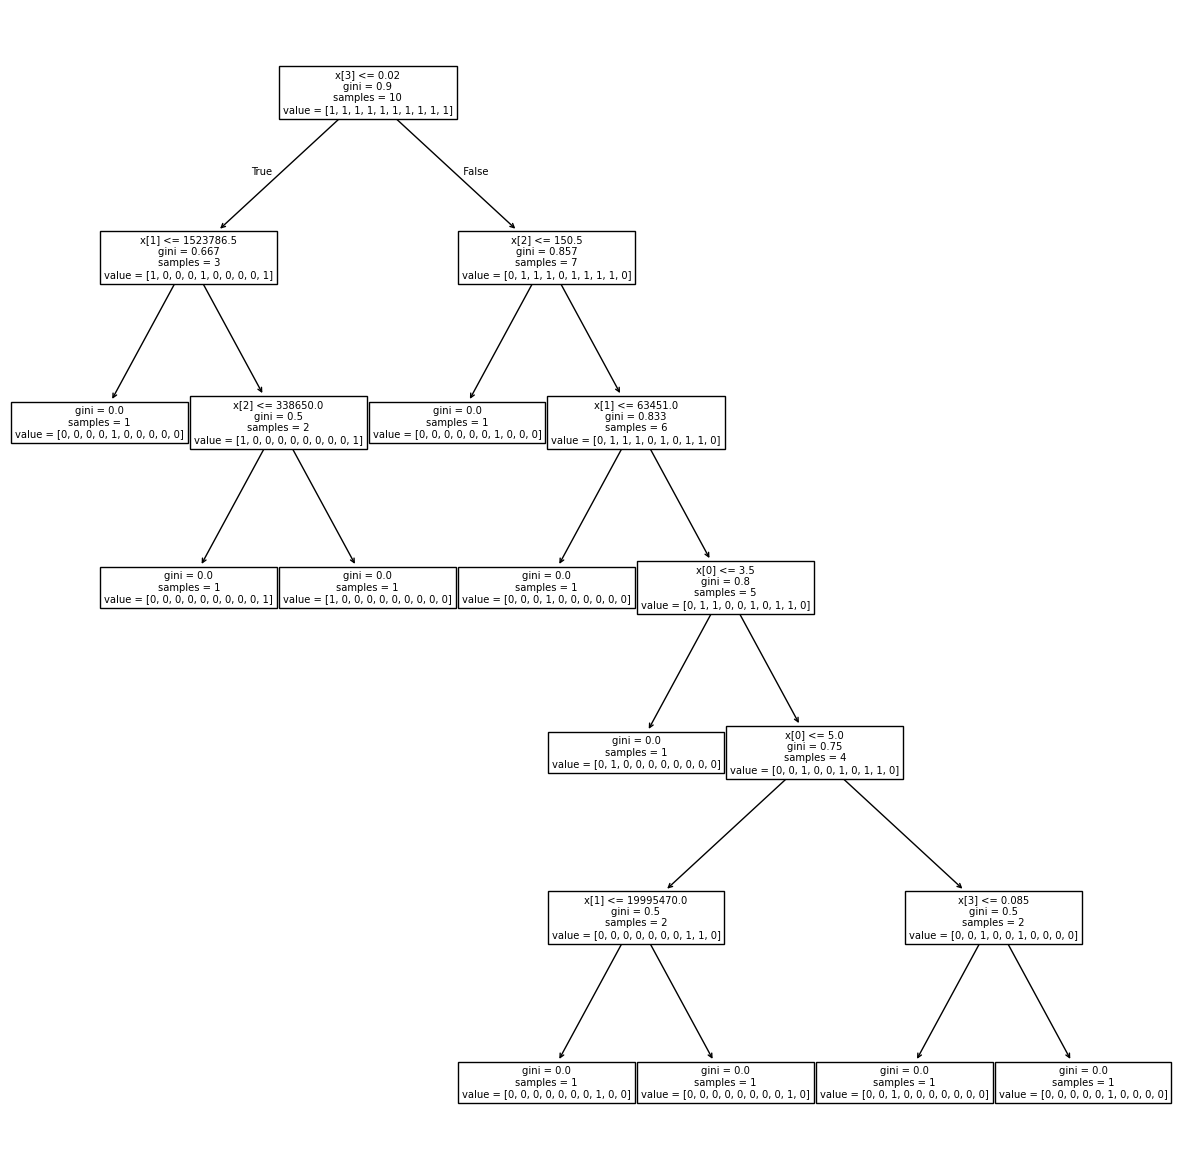

In [28]:
from sklearn import tree
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pandas as pd

df = pd.read_csv("countries.csv")

# make data useable
df["Country"] = df["Country"].astype(str).str.strip()
df["Region"] = df["Region"].astype(str).str.strip().str.upper()


# Label encoding für das Ziel (Y) und Region
le_country = LabelEncoder()
df["Country"] = le_country.fit_transform(df["Country"])


le_region = LabelEncoder()
df["Region"] = le_region.fit_transform(df["Region"])


for col in ["Population", "Area (sq. mi.)", "Coastline (coast/area ratio)"]:
    df[col] = (
        df[col]
        .astype(str)
        .str.replace(",", ".", regex=False)
        .astype(float)
    )


# Features und Ziel setzen
feature_columns = [
    "Region",
    "Population",
    "Area (sq. mi.)",
    "Coastline (coast/area ratio)"
]

# X (input) => Feature values such as population range continent, etc.
# each element of array is to be a fact of the country (e.g. "80'000'000 => population of germany")
X = df[feature_columns].iloc[:10].values

# Y (output) => country which the element of X refers to
# for the above example => "germany"
Y = df["Country"].iloc[:10].values

# Decision Tree trainieren
clf = tree.DecisionTreeClassifier()
clf.fit(X, Y)
plt.figure(figsize=(15, 15))  # Adjust the

tree.plot_tree(clf)
plt.show()

In [ ]:
clf.get_n_leaves()
clf.get_depth()

42

### Prediction based on hard coded input

In [27]:
# prediction based on input
region_example = le_region.transform(["WESTERN EUROPE"])[0]
example = [[region_example, 83000000, 357000, 0.34]]
predicted = clf.predict(example)
predicted_country = le_country.inverse_transform(predicted)

df1 = pd.get_dummies(df,prefix=['Region'], columns = ['Region'], drop_first=True)

print(predicted_country)
df1

['Finland']


,Country,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),...,Region_1,Region_2,Region_3,Region_4,Region_5,Region_6,Region_7,Region_8,Region_9,Region_10
0,0,31056997.0,647500.0,"48,0",0.00,"23,06","163,07",700.0,"36,0","3,2",...,False,False,False,False,False,False,False,False,False,False
1,1,3581655.0,28748.0,"124,6",1.26,"-4,93","21,52",4500.0,"86,5","71,2",...,False,False,True,False,False,False,False,False,False,False
2,2,32930091.0,2381740.0,"13,8",0.04,"-0,39",31,6000.0,"70,0","78,1",...,False,False,False,False,False,True,False,False,False,False
3,3,57794.0,199.0,"290,4",58.29,"-20,71","9,27",8000.0,"97,0","259,5",...,False,False,False,False,False,False,False,True,False,False
4,4,71201.0,468.0,"152,1",0.00,"6,6","4,05",19000.0,"100,0","497,2",...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,222,2460492.0,5860.0,"419,9",0.00,"2,98","19,62",800.0,NaN,"145,2",...,False,False,False,False,True,False,False,False,False,False
223,223,273008.0,266000.0,"1,0",0.42,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,True,False,False,False,False
224,224,21456188.0,527970.0,"40,6",0.36,0,"61,5",800.0,"50,2","37,2",...,False,False,False,False,True,False,False,False,False,False
225,225,11502010.0,752614.0,"15,3",0.00,0,"88,29",800.0,"80,6","8,2",...,False,False,False,False,False,False,False,False,True,False


In [25]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import gradio as gr
from sklearn.tree import _tree

df = pd.read_csv("countries.csv")
df["Country"] = df["Country"].astype(str).str.strip()
df["Region"] = df["Region"].astype(str).str.strip().str.upper()

le_country = LabelEncoder()
df["Country"] = le_country.fit_transform(df["Country"])

le_region = LabelEncoder()
df["Region"] = le_region.fit_transform(df["Region"])

for col in ["Population", "Area (sq. mi.)", "Coastline (coast/area ratio)"]:
    df[col] = (
        df[col]
        .astype(str)
        .str.replace(",", ".", regex=False)
        .astype(float)
    )

feature_columns = [
    "Region",
    "Population",
    "Area (sq. mi.)",
    "Coastline (coast/area ratio)"
]

X = df[feature_columns].values
Y = df["Country"].values

clf = tree.DecisionTreeClassifier()
clf.fit(X, Y)

class AkinatorSession:
    def __init__(self, clf, feature_names, le_country, le_region):
        self.clf = clf
        self.tree = clf.tree_
        self.feature_names = feature_names
        self.le_country = le_country
        self.le_region = le_region
        self.node = 0
        self.finished = False
        self.prediction = None

    def make_question(self):
        feature_index = self.tree.feature[self.node]
        threshold = self.tree.threshold[self.node]
        feature_name = self.feature_names[feature_index]

        if feature_name == "Region":
            region_index = int(threshold + 0.5)  # runden für genaue Zuordnung
            try:
                region_name = self.le_region.inverse_transform([region_index])[0]
                return f"Ist dein Land in der Region '{region_name}'?"
            except:
                return f"Liegt dein Land in einer Region mit Index ≤ {region_index}?"
        else:
            return f"Ist '{feature_name}' ≤ {round(threshold, 2)}?"

    def answer(self, response):
        if self.finished:
            return "Das Spiel ist vorbei."

        if response == "Ja":
            self.node = self.tree.children_left[self.node]
        else:
            self.node = self.tree.children_right[self.node]

        if self.tree.feature[self.node] == _tree.TREE_UNDEFINED:
            class_index = self.tree.value[self.node].argmax()
            self.prediction = self.le_country.inverse_transform([class_index])[0]
            self.finished = True
            return f"Ich denke, dein Land ist: {self.prediction.strip()}"
        else:
            return self.make_question()

session = AkinatorSession(clf, feature_columns, le_country, le_region)

# Gradio UI
def play_game(response):
    return session.answer(response)

with gr.Blocks() as demo:
    gr.Markdown("# MaGa-Länder-Akinator")
    question = gr.Textbox(value=session.make_question(), label="Frage", interactive=False)
    output = gr.Textbox(label="Antwort der KI", interactive=False)
    with gr.Row():
        yes_btn = gr.Button("Ja")
        no_btn = gr.Button("Nein")

    def on_yes():
        result = play_game("Ja")
        question.value = result if not session.finished else ""
        return result

    def on_no():
        result = play_game("Nein")
        question.value = result if not session.finished else ""
        return result

    yes_btn.click(fn=on_yes, outputs=output)
    no_btn.click(fn=on_no, outputs=output)

demo.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://d86cdd0c0e5c97bdeb.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
